![](https://i.imgur.com/0AUxkXt.png)

# Assignment 3 - From data to insights

Before you explore the data, write down a short list of what you expect to see in the data: the distribution of key variables, the relationships between important pairs of them, and so on. Such a list is essentially a prediction based on your current understanding of the business.

Now analyze the data. Make plots, do summaries, whatever is needed to see if it matches your expectations.

Is there anything that doesn’t match? Anything that makes you go “That’s odd” or “That doesn’t make any sense.”?

Zoom in and try to understand what in your business is making that weird thing show up in the data like that. This is the critical step.

You may have just found an insight into the business and increased your understanding


## The data analysis checklist

This checklist can be used as a guide during the process of a data analysis, or as a way to evaluate the quality of a reported data analysis.

### Answering the first questions

1. Did you define the metric for success before beginning?
2. Did you understand the context for the question and business application?
3. Did you consider whether the question could be answered with the available data?

### Cleaning the data

1. Did you identify the missing data?
2. Is each variable one column?
3. Do different data types appear in each table?
4. Did you try to identify any errors or miscoding of variables?
5. Did you check for outliers?

### Exploratory analysis

1. Did you make univariate plots (histogram, distplot, boxplot)?
2. Did you consider correlations between variables (scatterplot, jointplot, kde plot, correlation matrix)?
3. Did you check the units of all data points to make sure they are in the right range?

### Presentations

1. Did you lead with a brief, understandable to everyone of your problem?
2. Did you explain the data, describe the question of interest?
3. Did you make sure all legends and axes were legible from the back of the room?

## Dataset - Online Retailes Purchase

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".


### Step 1 - Checking the data

**Import tools set**

In [1]:
# Your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Import data**

In [2]:
# link = "https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv"
# Note: set param encoding = 'latin1'
# Your code here
df = pd.read_csv('../dataset/Online_Retail.csv', encoding='iso-8859-1')

In [3]:
# Print out First 5 rows from dataframe
# Your code here
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [4]:
# Print out brief info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Find som more information

In [5]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [7]:
df['CustomerID'].nunique()

4372

### Step 2 - Cleaning the data

Few of useful data cleaning functions:

* `s.astype('category')` # This will convert the datatype of the series to float *Please note that "s" here is a Pandas Series

* `s.replace(1,'one')` # This will replace all values equal to 1 with 'one'

* `s.replace([1,3],['one','three'])` # This will replace all 1 with 'one' and 3 with 'three'

* `data.rename(columns=lambda x: x + 1)` # Mass renaming of columns

* `data.rename(columns={'oldname': 'new name'})` # Selective renaming

* `data.set_index('column_one')` #  This will change the index

* `data.rename(index=lambda x: x + 1)` # Mass renaming of index

* `data.dropna()` # Remove missing values

* `data.fillna(x)` #  This will replaces all null values with x

* `s.fillna(s.mean())` # This will replace all null values with the mean (mean can be replaced with almost any function from the below section) :

* `data.corr()` # This will return the correlation between columns in a DataFrame

* `data.count()` # This will return the number of non-null values in each DataFrame column

* `data.max()` # This will return the highest value in each column

* `data.min()` # This will return the lowest value in each column

* `data.median()` # This will return the median of each column

* `data.std()` # This will returns the standard deviation of each column


**Check for NaN values**

In [8]:
# Your code here
df.isna().sum(0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Examine few examples of NaN values**

In [9]:
# List all NaN values
df.loc[(df['Description'].isna()) | (df['CustomerID'].isna())]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/10 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/10 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/10 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/10 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/10 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/11 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/11 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/11 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/11 10:26,10.79,NaN,United Kingdom


**Exclude negative Quatity entries**

In [10]:
print(df[df['Quantity'] < 0].info())
df = df[df['Quantity'] >= 0]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10624 entries, 141 to 541717
Data columns (total 8 columns):
InvoiceNo      10624 non-null object
StockCode      10624 non-null object
Description    9762 non-null object
Quantity       10624 non-null int64
InvoiceDate    10624 non-null object
UnitPrice      10624 non-null float64
CustomerID     8905 non-null float64
Country        10624 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 747.0+ KB
None


In [11]:
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


**Exclude negative Price entries**

In [12]:
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/11 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/11 14:52,-11062.06,NaN,United Kingdom


In [14]:
df = df[df['UnitPrice'] > 0]
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


### Step 3 - EDA

**The customer with the highest number of orders comes from the United Kingdom (UK)**

**Approach 1:** Here I assume that **Quantity** is the number of **Orders**

Find the CustomerID with the highest number of orders comes from the UK

In [15]:
# Your code here
df[df['Country'] == 'United Kingdom'].groupby('CustomerID')\
                    .sum().sort_values(by='Quantity', ascending=False).head(1)

,Quantity,UnitPrice
CustomerID,,
16446.0,80997,4.98


Because `groupby` will not include data come from customers who have a null CustomerID, let's find the most Quantity by customer who CustomerID = null

In [16]:
df.loc[(df['CustomerID'].isna()) * (df['Country']=='United Kingdom')].sort_values(by='Quantity', ascending=False).head(1)

C:\Users\Admin\Miniconda3\envs\datascience\lib\site-packages\pandas\core\computation\expressions.py:194: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  op=op_str, alt_op=unsupported[op_str]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
447035,574941,22197,POPCORN HOLDER,1820,11/7/11 17:42,1.95,NaN,United Kingdom


Luckily, this number is way more smaller the number 80997 by CustomerID 16446, so we can say that, the customer with CustomerID = 16446.0 has the highest number of orders in UK

**Approach 2:** Here I assume that **Each Line** is an **Order**

Find the customer with highest order comes from UK

In [17]:
df[df['Country']=='United Kingdom']['CustomerID'].value_counts().sort_values(ascending=False).head(1).to_frame()

,CustomerID
17841.0,7847


Because value_counts() not include customer who have a null CustomerID, let's find the most Quanity by Customer who has a null CustomerID

In [18]:
df.loc[(df['Country']=='United Kingdom') & (df['CustomerID'].isna())].\
                        sort_values(by='Quantity', ascending=False).head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
447035,574941,22197,POPCORN HOLDER,1820,11/7/11 17:42,1.95,NaN,United Kingdom


So in this scenairo, the customer with CustomerID = 178841.0 has the highest number of orders

**The customer with the highest money spent on purchases comes from Netherlands**

In [20]:
# Your code here
df_netherlands = df[df['Country']=='Netherlands']
df_netherlands['MoneySpent'] = df_netherlands['Quantity']*df_netherlands['UnitPrice']
df_netherlands.groupby('CustomerID').sum().sort_values(by='MoneySpent', ascending=False).head(1)

C:\Users\Admin\Miniconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Quantity,UnitPrice,MoneySpent
CustomerID,,,
14646.0,196915,5176.09,280206.02


**On which year had the highest sales?**

In [21]:
def getYear(x):
    # This function takes InvoiceDate string as input, 
    # Then it returns the year of the product
    tmp = x[:x.find(' ')]
    tmp = tmp[tmp.rfind('/')+1:tmp.rfind('/')+3]
    return 2000 + int(tmp)

Add **Year** and **MoneySpent** to df

In [22]:
df['Year'] = df['InvoiceDate'].apply(getYear)

In [23]:
df['MoneySpent'] = df['Quantity'] * df['UnitPrice']

In [24]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,MoneySpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,2010,20.34


In [25]:
df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,MoneySpent
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France,2011,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France,2011,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France,2011,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France,2011,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France,2011,14.85


In [30]:
df.groupby('Year').sum()

,Quantity,UnitPrice,CustomerID,MoneySpent
Year,,,,
2010,359239,1.999045e+05,4.061968e+08,8.237461e+05
2011,5229137,1.871543e+06,5.679210e+09,9.842938e+06


From the above result, we can say that the year 2011 has the highest sales

**How many orders (per hour)?**
First, i define a function to get the hour. 
This function works like this (and can only be apply in this scenario only):
- 0:50 -> 0
- 1:13 -> 1
- 14:22 -> 14

In [32]:
def getHour(x):
    # This function takes InvoieDate string as input
    # Then it returns Hour of the product
    return int(x[x.find(' ')+1:x.find(':')])

In [33]:
df['Hour'] = df['InvoiceDate'].apply(getHour)
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,MoneySpent,Hour
302780,563444,20652,BLUE POLKADOT LUGGAGE TAG,4,8/16/11 13:50,1.25,16033.0,United Kingdom,2011,5.00,13
291812,562519,22383,LUNCH BAG SUKI DESIGN,1,8/5/11 12:37,1.65,16764.0,United Kingdom,2011,1.65,12
114372,546008,85014A,BLACK/BLUE POLKADOT UMBRELLA,1,3/8/11 15:43,12.46,NaN,United Kingdom,2011,12.46,15
224517,556531,22123,PING MICROWAVE APRON,12,6/13/11 11:49,1.95,15491.0,United Kingdom,2011,23.40,11
86582,543555,21668,RED STRIPE CERAMIC DRAWER KNOB,12,2/10/11 10:18,1.25,17686.0,United Kingdom,2011,15.00,10
145015,548864,21626,VINTAGE UNION JACK PENNANT,1,4/4/11 14:00,1.95,15756.0,United Kingdom,2011,1.95,14
69927,541992,21929,JUMBO BAG PINK VINTAGE PAISLEY,100,1/25/11 9:31,1.65,16029.0,United Kingdom,2011,165.00,9
272125,560732,23198,PANTRY MAGNETIC SHOPPING LIST,4,7/20/11 14:55,1.45,14056.0,United Kingdom,2011,5.80,14
495433,578305,23410,CURIO CABINET LINEN AND LACE,2,11/23/11 15:44,7.05,14088.0,United Kingdom,2011,14.10,15
20817,538071,21787,RAIN PONCHO RETROSPOT,2,12/9/10 14:09,1.66,NaN,United Kingdom,2010,3.32,14


**Approach 1**
- Here I assume that **Quantity** is the **number of Orders**

This is the average order per hour

In [39]:
OPH_df = df[['Quantity','Hour']].groupby('Hour').mean().sort_values(by='Quantity', ascending=False)
OPH_df

,Quantity
Hour,
7,40.554090
8,18.079205
10,17.017377
9,15.373372
11,12.018062
20,11.953865
12,10.885931
13,9.947536
19,9.417923


Text(0.5, 1.0, 'Average Quantity per Hour')

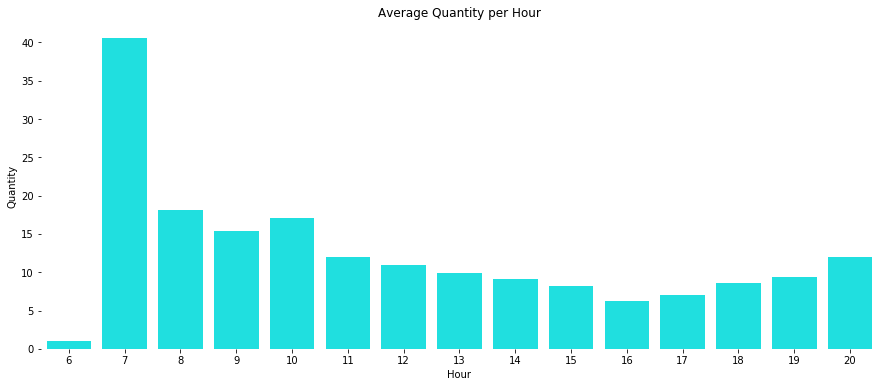

In [94]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(x="Hour", y="Quantity", data=OPH_df, color='cyan')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False)
plt.title('Average Quantity per Hour')

This chart look weird enough for me to consider Approach 2

**Approach 2:** 
- Here i assume that **Each line** is an **Order**
- This approach seems more reasonable than Approach 1
- Why ?
    - Let's take a look at this chart: **Toal Order for every hour**

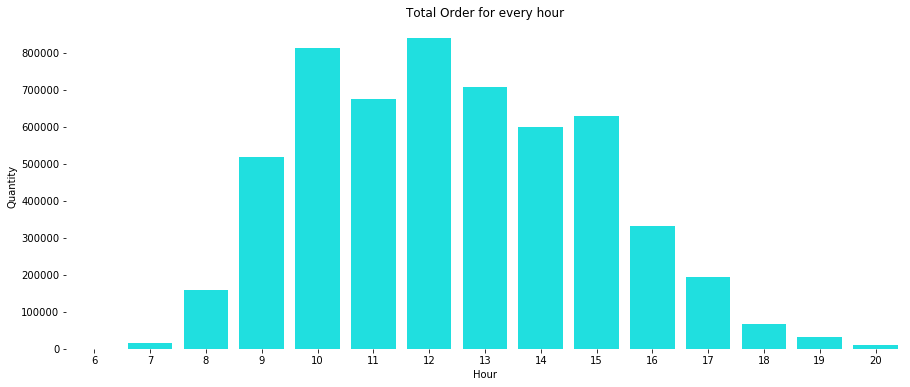

In [92]:
approach2_df = df[['Quantity','Hour']].groupby(by='Hour').sum().sort_values(by='Quantity', ascending=False).reset_index()
fig, ax = plt.subplots(figsize=(15, 6))
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False)
plt.title('Total Order for every hour')
sns.barplot(x='Hour', y='Quantity', data = approach2_df, color='cyan')

- This chart has a totally different distribution compared to the former one.
- Let's find the number of avarage orders per hour.
- We can get this number by this formula:
$$ OPH_i = \frac{\sum_{N}Order_i}{N}$$
- Where
    - $OPH_i$ is the Order Per Hour of Hour i
    - $Order_i$ is the Number Order that take place in Hour i
    - $N$ is the number of day that Order in Hour i happens

Add a SimpleDate column in df, where SimplDate wouild store mm/dd/yy only.

In [171]:
def getSimpleDate(x):
    # This function takes InvoieDate String as input
    # Then it returns SimpleDate string : mm/dd/yy (kind of)
    return x[:x.find(' ')]

df['SimpleDate'] = df['InvoiceDate'].apply(getSimpleDate)
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,MoneySpent,Hour,Month,SimpleDate
532818,580997,23580,SNACK TRAY HAPPY FOREST,3,12/6/11 17:23,1.95,15023.0,United Kingdom,2011,5.85,17,12,12/6/11
115842,546155,20728,LUNCH BAG CARS BLUE,10,3/10/11 8:29,1.65,15632.0,United Kingdom,2011,16.50,8,3,3/10/11
944,536514,22866,HAND WARMER SCOTTY DOG DESIGN,36,12/1/10 12:40,2.10,17951.0,United Kingdom,2010,75.60,12,12,12/1/10
215346,555701,84946,ANTIQUE SILVER T-LIGHT GLASS,72,6/6/11 14:34,1.06,14498.0,United Kingdom,2011,76.32,14,6,6/6/11
325381,565439,23355,HOT WATER BOTTLE KEEP CALM,4,9/4/11 13:56,4.95,14852.0,United Kingdom,2011,19.80,13,9,9/4/11


Next:
- For each hour, get that hour data frame
- For each hour data frame, group by SimpleDate 
- Calculate the average order per hour

Here's an demo for hour = 12

In [172]:
df_12 = df[df['Hour']==12]
df_12.groupby(by='SimpleDate').size().reset_index(name='Appearance')

,SimpleDate,Appearance
0,1/10/11,63
1,1/11/11,325
2,1/12/11,93
3,1/13/11,163
4,1/14/11,186
...,...,...
300,9/5/11,286
301,9/6/11,278
302,9/7/11,762
303,9/8/11,453


In [174]:
df_12.groupby(by='SimpleDate').size().reset_index(name='Appearance')['Appearance'].mean()

252.85245901639345

In [183]:
hourList = list(df['Hour'].unique())
avg_order = []

for hour in hourList:
    avg_order.append(df[df['Hour']==hour].groupby(by='SimpleDate').size().reset_index(name='Appearance')['Appearance'].mean())
    
avg_oph_df = pd.DataFrame(list(zip(hourList, avg_order)), columns=['Hour','Average Orders'])
avg_oph_df

,Hour,Average Orders
0,8,42.926829
1,9,133.734127
2,10,157.828383
3,11,184.062295
4,12,252.852459
5,13,234.326733
6,14,218.334437
7,15,253.308970
8,16,194.069091
9,17,133.154589


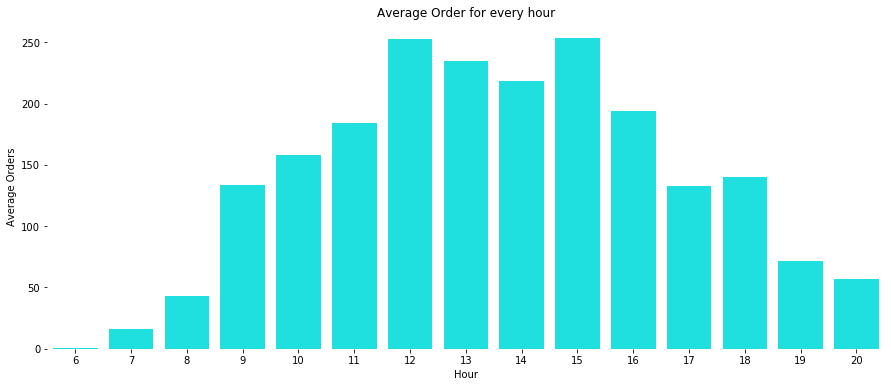

In [185]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False)
plt.title('Average Order for every hour')
sns.barplot(x='Hour', y='Average Orders', data = avg_oph_df, color='cyan')

This plot distribution is quite similar to the `Total Order for every hour` plot above.

**Make a plot about number of orders per hour**

As can be seen from above, **Approach 2** seems to be more reasonable because it shows what causes more impact on the data. So from now on, the **Approach 2** will be chosen for later calculation: **Each line** is an **Order**

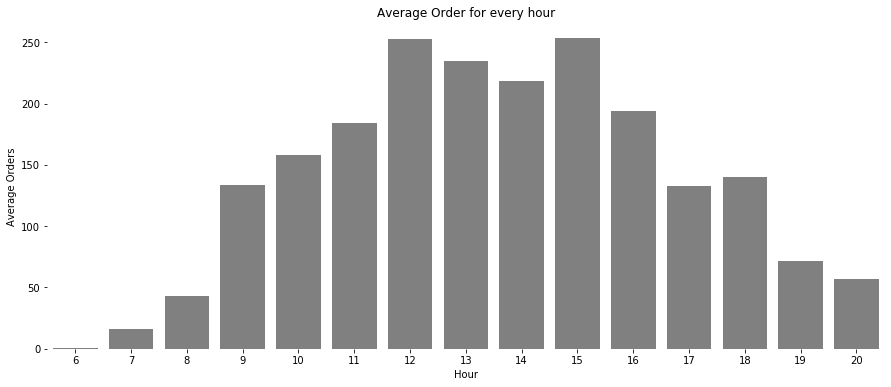

In [213]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False)
plt.title('Average Order for every hour')
sns.barplot(x='Hour', y='Average Orders', data = avg_oph_df, color='gray')

**How many orders (per month)?**

In [199]:
def getMonth(x):
    # This function takes InvoiceDate string as input
    # Then it returns the month in integer
    return int(x[:x.find('/')])

In [200]:
df['Month'] = df['InvoiceDate'].apply(getMonth)

In [201]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,MoneySpent,Hour,Month,SimpleDate
18732,537823,22024,RAINY LADIES BIRTHDAY CARD,1,12/8/10 14:25,0.85,NaN,United Kingdom,2010,0.85,14,12,12/8/10
10429,537237,22124,SET OF 2 TEA TOWELS PING MICROWAVE,2,12/6/10 9:58,2.51,NaN,United Kingdom,2010,5.02,9,12,12/6/10
501135,578821,22617,BAKING SET SPACEBOY DESIGN,50,11/25/11 13:59,4.25,17389.0,United Kingdom,2011,212.50,13,11,11/25/11
301877,563358,23118,PARISIENNE JEWELLERY DRAWER,1,8/15/11 14:51,7.50,17858.0,United Kingdom,2011,7.50,14,8,8/15/11
3550,536637,22653,BUTTON BOX,2,12/2/10 11:35,1.95,18041.0,United Kingdom,2010,3.90,11,12,12/2/10


We can do the same process that  was applied for Hour
$$ OPM_i = \frac{\sum_{N}Order_i}{N}$$
- Where
    - $OPM_i$ is the Order Per Month of Month i
    - $Order_i$ is the Number Order that take place in Month i
    - $N$ is the number of year that Order in Month i happens

In [291]:
df[df['Month']==1].groupby(by='Year').size().reset_index(name='Appearance')['Appearance'].mean()

34306.0

In [293]:
monthList = list(df['Month'].unique())
avg_order = []

for month in monthList:
    avg_order.append(df[df['Month']==month].groupby(by='Year').size().reset_index(name='Appearance')['Appearance'].mean())
    
avg_opm_df = pd.DataFrame(list(zip(monthList, avg_order)), columns=['Month','Average Orders'])
avg_opm_df

,Month,Average Orders
0,12,33295.5
1,1,34306.0
2,2,27105.0
3,3,35803.0
4,4,29096.0
5,5,36164.0
6,6,35977.0
7,7,38645.0
8,8,34483.0
9,9,49261.0


**Make a plot about number of orders per month**

Text(1.0, 1.0, 'Total Order for every Month')

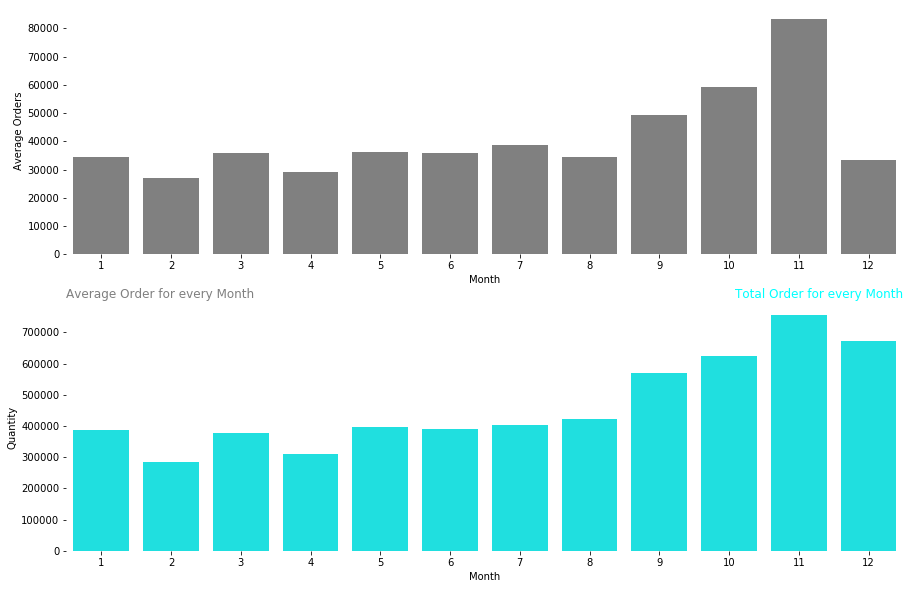

In [294]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))

sns.barplot(x='Month', y='Average Orders', data = avg_opm_df, color='gray', ax=ax[0])
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False)
plt.title('Average Order for every Month', loc='left', color="grey")

totalMonth_df = df[['Quantity','Month']].groupby(by='Month').sum().sort_values(by='Quantity', ascending=False).reset_index()
sns.barplot(x='Month', y='Quantity', data = totalMonth_df, color='cyan', ax=ax[1])
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False)
plt.title('Total Order for every Month', loc='right', color="cyan")

**Top 10 items most sales**

Assume that every product representd by their Unique StockCode

In [255]:
sale_df =df [['StockCode','Quantity']]
sale_df.groupby(by='StockCode').sum().reset_index().sort_values(by='Quantity', ascending=False).head(10)

,StockCode,Quantity
2465,23843,80995
2020,23166,78033
1109,22197,56921
2909,84077,55047
3387,85099B,48474
3407,85123A,37660
3194,84879,36461
439,21212,36419
1942,23084,30788
1374,22492,26633


**Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK**

In [324]:
# Your code here
country_df = df[['Quantity','Country']]
country_df = country_df[country_df['Country']!='United Kingdom']

# Take a look at five leader
country_df.groupby('Country').sum().reset_index().sort_values(by='Quantity', ascending=False).mean()

Quantity    25026.648649
dtype: float64

In [308]:
len(country_df['Country'].unique())

37

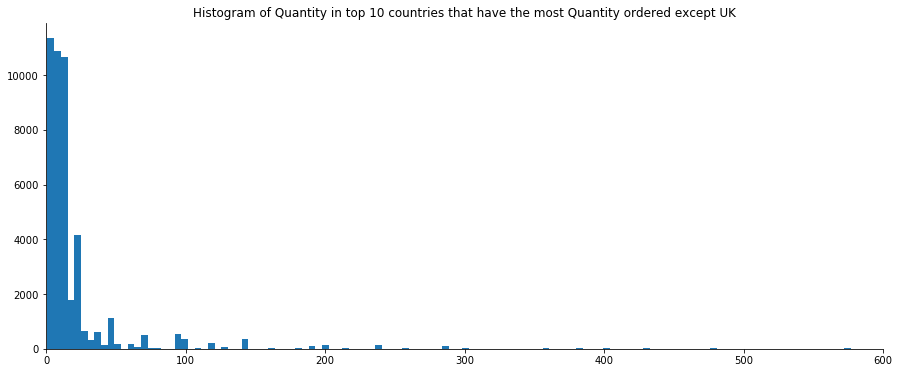

In [341]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.hist(country_df['Quantity'], bins=500)
plt.xlim(0,600)
plt.title('Histogram of Quantity in top 10 countries that have the most Quantity ordered except UK')
sns.despine(top=True, right=True)

# What can you tell about this
- People usually order with quantity range from 1 to ~25.
- The bigger the number of quantity become, the less interest people show.
- Some people tend to order items at some multiples of 100 (100,200)

### You are awesome!!